<a href="https://colab.research.google.com/github/YCYoon2015/DL_zero_to_all_TensorFlow/blob/master/210914_Basic_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
tf.random.set_seed(555)

2.6.0


# Softmax Classifier

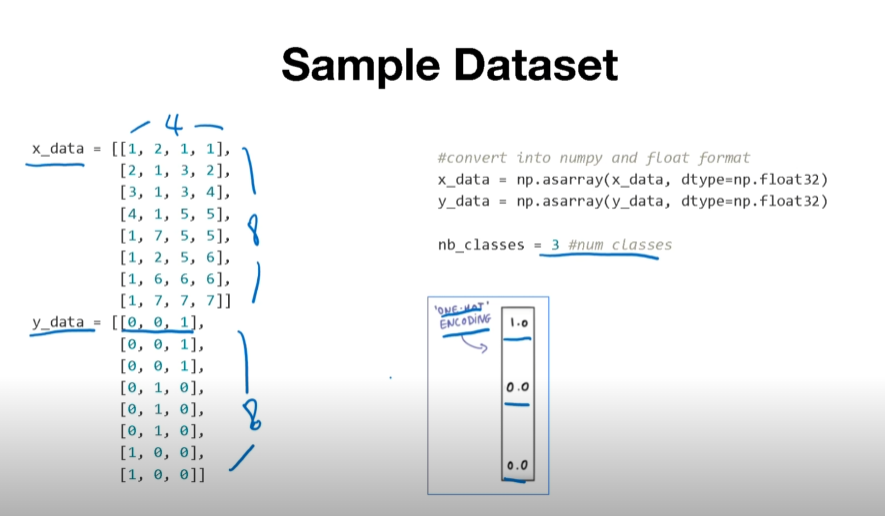

In [2]:

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#convert into numpy and float format
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

X = 8*4

Y = 8*3

https://wikidocs.net/22647

여기서 y_data는 one-hot encoding으로 표현되어있다. 3개의 클래스가 주어지는데 답은 0,1로 나온다.

A, B, C 3개의 클래스가 있을때 100 010 001 처럼 만들수 있다.

In [3]:

#dataset을 선언합니다.
# dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
# dataset = dataset.repeat().batch(2)

nb_classes = 3 #class의 개수입니다.

print(x_data.shape)
print(y_data.shape)

(8, 4)
(8, 3)


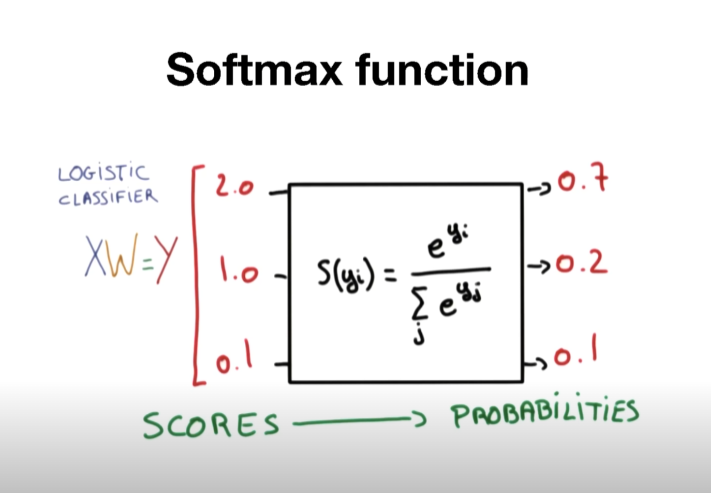

softmax function은 이진분류 이상의 더 다양한 분류조건에서 활용한다.

위 그림과같이 X의 입력값과 W의 가중치 Y의 결과값이 사용되고, 결과값(score)를 구한이후 softmax라는 함수를 통과시키면 출력값이 오른쪽과같이 확률로 나타난다. 

이를 TF로 표현하면 아래와같다.



In [ ]:
# hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
# 가설 = 소프트맥스(XW + b)

In [4]:
# Weight and bias setting

W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
# 텐서플로우 Eager: 나중에 실행하려는 그래프 방식이 아니라, 즉시 실행한다는 의미이다. 계산값을 즉시 알려준다.
# random.normal안에 변수는 4개의 특징값과, 3개의 클래스가 들어간다.
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

print(W,b)


<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.3556248 , -0.34941742, -0.6252126 ],
       [-0.24970897, -0.5555315 ,  0.7666141 ],
       [-0.15783705,  1.6257638 ,  0.18189523],
       [ 1.3667852 ,  1.7595001 , -0.41443336]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([-0.554567  ,  0.45192114, -0.93305594], dtype=float32)>


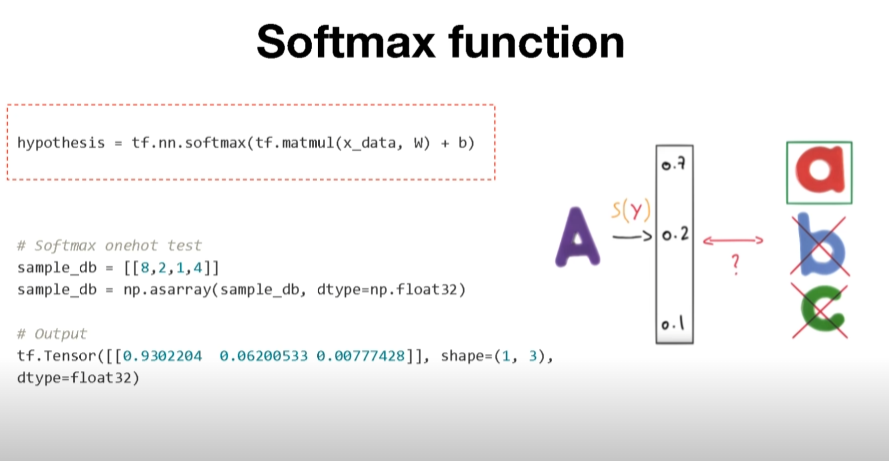

위 sample_db를 소프트맥스에 넣고 결과를 확인한다. 다음과 같은 결과라면 첫번째 값이 선택되었다고 볼수있다.

In [5]:
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

print(hypothesis(x_data))

tf.Tensor(
[[6.6194043e-02 8.7127423e-01 6.2531695e-02]
 [1.0589649e-03 9.9884915e-01 9.1878341e-05]
 [4.8014044e-04 9.9951887e-01 9.0255338e-07]
 [9.1014035e-06 9.9999094e-01 4.3415644e-09]
 [5.8085068e-05 9.9991429e-01 2.7678681e-05]
 [8.5007696e-06 9.9999154e-01 4.2368957e-09]
 [4.8542306e-06 9.9999487e-01 1.9805589e-07]
 [7.4778569e-07 9.9999928e-01 1.9943384e-08]], shape=(8, 3), dtype=float32)


### 이제 cost함수를 정의하자.

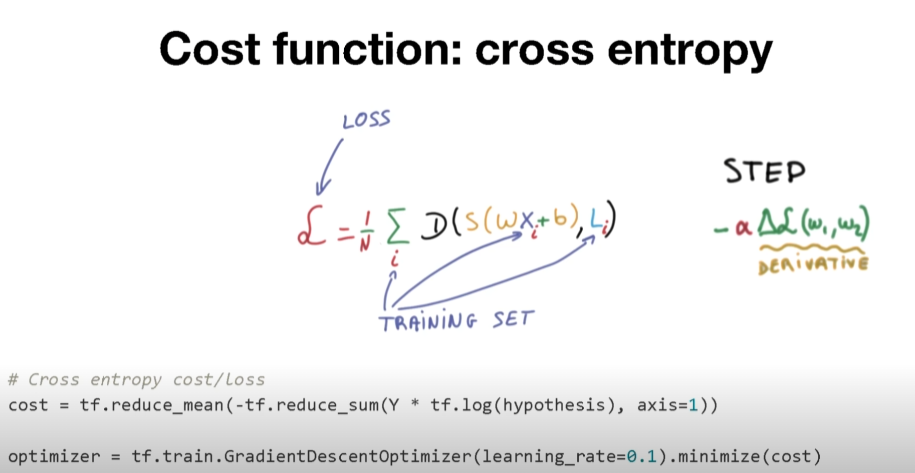

Y*log(Y_hat)이다. 정답이면 cost가 낮고 오답이면 cost 높다는걸 기억하자

In [6]:
def cost_fn(X, Y):
    logits = hypothesis(X) # 위 가설
    cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1)
    # 각 코스트를 구한다. cost entropy 수식이다
    cost_mean = tf.reduce_mean(cost)
    # 코스트의 평균을 구한다. (최종값)
    
    return cost_mean

print(cost_fn(x_data, y_data))

tf.Tensor(6.540885, shape=(), dtype=float32)


이제 코스트를 낮출 경사하강법 순서이다.

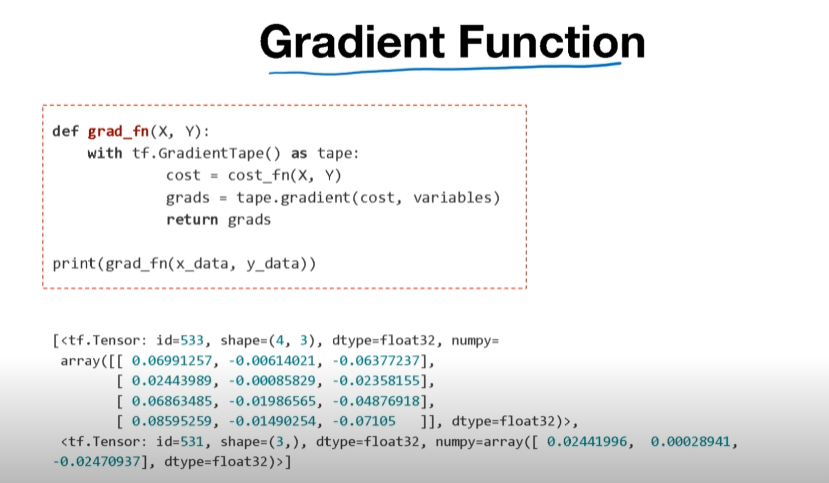

In [7]:
def grad_fn(X, Y):
    with tf.GradientTape() as tape: # tape에 기울기 저장
        loss = cost_fn(X, Y) # cost값을 바탕으로
        grads = tape.gradient(loss, variables) # 경사하강 반영, lost는 위 cost이고, variables는 [W, b]이다.
        return grads

# 그래디언트는 역전파 알고리즘에서 자동으로 미분(즉시 실행)하기위해 저장이 필요하다.
# 위 gradienttape는 실행된 모든 연산을 tape에 기록한다. 다음에 뒤로가면서 자동미분하는것이다.
# 이는 대부분의 eager 실행에 큰 비용이 들지 않는다. 다른 경우는 고민해보자. 


print(grad_fn(x_data, y_data))

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[-0.24126738,  0.9834241 , -0.74215674],
       [-1.6082008 ,  2.092532  , -0.48433107],
       [-1.616097  ,  2.4832282 , -0.8671313 ],
       [-1.6161683 ,  2.4833107 , -0.8671427 ]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.2415232 ,  0.6086917 , -0.36716846], dtype=float32)>]


위에 가설과 cost와 gradient가 구해졌다. 이제 학습해야 한다.
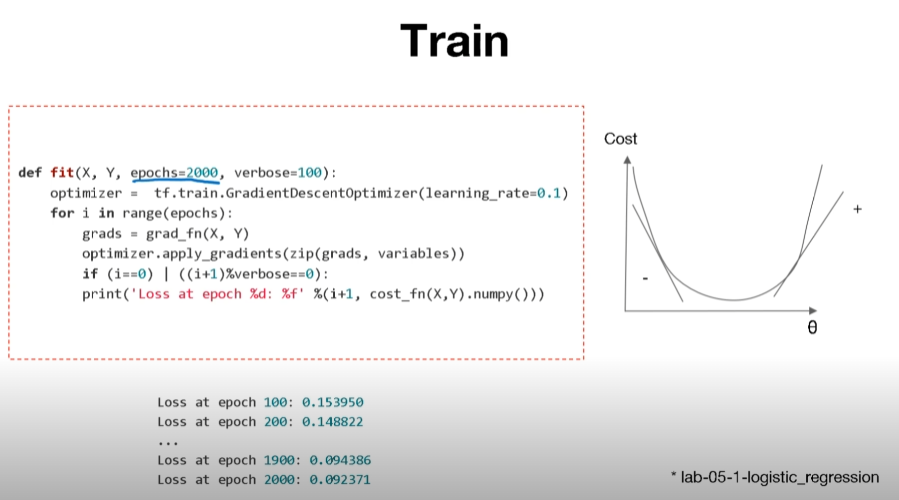

In [8]:
def fit(X, Y, epochs=2000, verbose=100): # 2000번 학습 수행, 100번마다 확인
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1) # 경사하강법

    for i in range(epochs):
        grads = grad_fn(X, Y) # 위에서 만든 그레디언트
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0): # 100번마다 출력하여 학습이 정상적으로 수행되는지 확인한다.
            print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy())) # loss를 출력한다.
            
fit(x_data, y_data)

Loss at epoch 1: 3.740999
Loss at epoch 100: 0.739240
Loss at epoch 200: 0.666169
Loss at epoch 300: 0.609655
Loss at epoch 400: 0.559175
Loss at epoch 500: 0.511473
Loss at epoch 600: 0.465168
Loss at epoch 700: 0.419540
Loss at epoch 800: 0.374179
Loss at epoch 900: 0.328994
Loss at epoch 1000: 0.284885
Loss at epoch 1100: 0.249536
Loss at epoch 1200: 0.234874
Loss at epoch 1300: 0.223612
Loss at epoch 1400: 0.213332
Loss at epoch 1500: 0.203912
Loss at epoch 1600: 0.195250
Loss at epoch 1700: 0.187259
Loss at epoch 1800: 0.179868
Loss at epoch 1900: 0.173011
Loss at epoch 2000: 0.166636


이제 학습이 끝났으니, 가설을통해 직접 예측해보자.
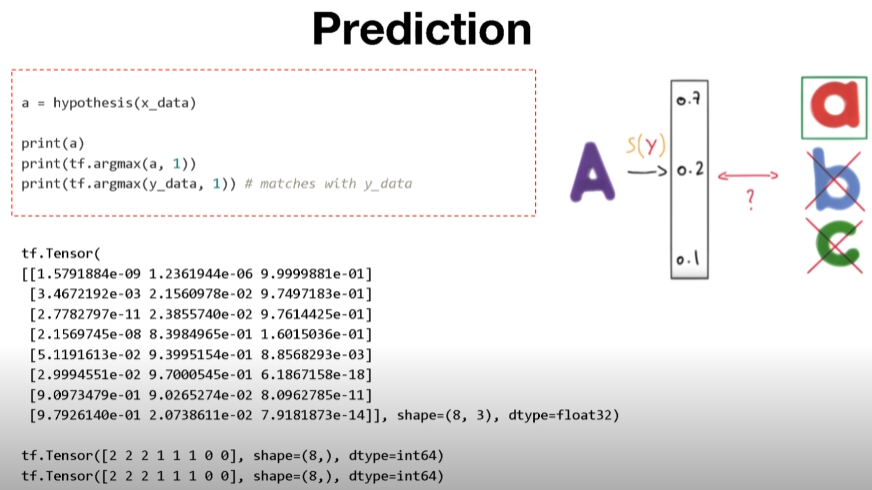

In [9]:

sample_data = [[2,1,3,2]] # answer_label [[0,0,1]]
sample_data = np.asarray(sample_data, dtype=np.float32)

a = hypothesis(sample_data)

print(a)
print(tf.argmax(a, 1)) #index: 2
# argemax로 값을 정해준다. 0.9119가 가장톺기에 index=2 선택

tf.Tensor([[0.00094935 0.0871122  0.9119384 ]], shape=(1, 3), dtype=float32)
tf.Tensor([2], shape=(1,), dtype=int64)


In [10]:
b = hypothesis(x_data)
print(b)
print(tf.argmax(b, 1))
print(tf.argmax(y_data, 1)) # matches with y_data
# argmax로 가장 높은값을 통해 원핫 인코딩 백터에 값을 구한다.

tf.Tensor(
[[2.0662355e-06 9.7449205e-04 9.9902344e-01]
 [9.4935310e-04 8.7112196e-02 9.1193843e-01]
 [1.8386528e-07 1.7247364e-01 8.2752615e-01]
 [3.3694787e-06 8.4228945e-01 1.5770720e-01]
 [2.7039233e-01 7.1695262e-01 1.2655104e-02]
 [1.4248425e-01 8.5751355e-01 2.2193153e-06]
 [7.3650736e-01 2.6347801e-01 1.4671402e-05]
 [9.1696876e-01 8.3031006e-02 2.1301084e-07]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
